

# Proyecto EDA

## Libros Ganadores del Premio Goodreads Choice Awards de 2023

Realizaré un análisis de datos de tipo EDA (análisis exploratorio de datos).

* Contestaré algunas preguntas relevantes.
* Buscaré relaciones entre los datos y las variables que los afectan.
* Además, identificaré valores perdidos y/o duplicados.
* También generaré gráficos para complementar el análisis.

---

# EDA Project

## 2023 Goodreads Choice Awards Winning Books

I will perform an EDA (exploratory data analysis).

* I will answer some relevant questions.
* I will look for relationships between the data and the variables that affect them.
* Additionally, I will identify missing and/or duplicated values.
* I will also generate charts to complement the analysis.





## Importación de librerías

Voy a usar las siguientes librerías:

* Pandas
* Matplotlib
* Seaborn

Verificaré los tipos de datos y la descripción general.

---

## Library Import

I will use the following libraries:

* Pandas
* Matplotlib
* Seaborn

I will check the data types and the general description.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [2]:
link = "Good_Reads_Book_Awards_Crawl_2023_12_27_11_14.csv"
df = pd.read_csv(link)

In [3]:
df.sample(5)

,source_URL,Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,Book Description,First Published date,Kindle Version and Price,Kindle Price,About the Author
298,https://www.goodreads.com/book/show/61273783-n...,1072,Humor,"Not Funny: Essays on Life, Comedy, Culture, Et...",Jena Friedman,3.76,658,120,256,Hardcover,For fans of the perceptive comedy of Hannah Ga...,18-Apr-23,Kindle $14.99,14.99,NaN
53,https://www.goodreads.com/book/show/63833664-a...,6741,Mystery & Thriller,After That Night,Karin Slaughter,4.36,"27,413","2,646",432,Hardcover,"After that night, nothing was ever the same ag...",22-Aug-23,Kindle $14.99,14.99,Karin Slaughter is the author of more than twe...
103,https://www.goodreads.com/book/show/60657589-e...,38650,Fantasy,Emily Wilde's Encyclopaedia of Faeries,Heather Fawcett,4.08,"48,295","9,817",325,Hardcover,A curmudgeonly professor journeys to a small t...,10-Jan-23,Kindle $12.99,12.99,Hello! Welcome to my page.I'm the author of bo...
142,https://www.goodreads.com/book/show/60784409-a...,22580,Horror,A House with Good Bones,T. Kingfisher,3.72,"25,131","4,707",247,Hardcover,A haunting Southern Gothic from an award-winni...,28-Mar-23,Kindle $13.99,13.99,T. Kingfisher is the vaguely absurd pen-name o...
29,https://www.goodreads.com/book/show/61273371-l...,19468,Historical Fiction,Looking for Jane,Heather Marshall,4.38,"29,873","3,669",400,Hardcover,A debut about three women whose lives are boun...,1-Mar-22,Kindle $12.99,12.99,Heather Marshall lives with her family near To...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   source_URL                299 non-null    object 
 1   Readers Choice Votes      299 non-null    int64  
 2   Readers Choice Category   299 non-null    object 
 3   Title                     299 non-null    object 
 4   Author                    299 non-null    object 
 5   Total Avg Rating          299 non-null    float64
 6   Number of Ratings         299 non-null    object 
 7   Number of Reviews         299 non-null    object 
 8   Number of Pages           299 non-null    int64  
 9   Edition                   299 non-null    object 
 10  Book Description          299 non-null    object 
 11  First Published date      299 non-null    object 
 12  Kindle Version and Price  299 non-null    object 
 13  Kindle Price              299 non-null    float64
 14  About the 



## Reducción de los datos

En este caso, voy a eliminar algunas columnas que no utilizaré para reducir el peso de los datos.

---

## Data Reduction

In this case, I will remove some columns that I will not use to reduce the data size.

In [5]:
#eliminando columnas inesesarias

df.drop(['source_URL', 'Book Description', 'About the Author'], axis=1, inplace=True)





## Verificación del contenido de los datos

En este caso, crearé un resumen de los tipos de datos y su peso en el dataset.

Utilizaré `info()` y `describe()` para obtener una visión general.

---

## Data Content Verification

In this case, I will create a summary of the data types and their weight in the dataset.

I will use `info()` and `describe()` to get an overview.


In [6]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Readers Choice Votes      299 non-null    int64  
 1   Readers Choice Category   299 non-null    object 
 2   Title                     299 non-null    object 
 3   Author                    299 non-null    object 
 4   Total Avg Rating          299 non-null    float64
 5   Number of Ratings         299 non-null    object 
 6   Number of Reviews         299 non-null    object 
 7   Number of Pages           299 non-null    int64  
 8   Edition                   299 non-null    object 
 9   First Published date      299 non-null    object 
 10  Kindle Version and Price  299 non-null    object 
 11  Kindle Price              299 non-null    float64
dtypes: float64(2), int64(2), object(8)
memory usage: 28.2+ KB
None
       Readers Choice Votes  Total Avg Rating  Number of 



## Limpieza de Datos

Lo primero que noto es que las columnas `Number of Ratings` y `Number of Reviews` no aparecen en la información de descripción, y es porque están como tipo de dato objeto, lo que impide el cálculo.

Revisando, encuentro comas que podrían ensuciar los datos al pasarlos a enteros. Debo reemplazarlas por espacios en blanco.

---

## Data Cleaning

The first thing I notice is that the `Number of Ratings` and `Number of Reviews` columns do not appear in the description information because they are of the object data type, which prevents calculation.

Upon reviewing, I find commas that could corrupt the data when converting to integers. I need to replace them with blank spaces.

In [7]:
#estas columnas contienen numeros pero estan como tipo obkjeto en el dataset. hay que pasarlas a numero entero para generar el analisis
numeric_colomns= ['Number of Ratings','Number of Reviews']

for columns in numeric_colomns:
    df[columns]=df[columns].replace(",","", regex=True).astype('int32')

    





### Modificación del Tipo de Datos

Modifico el tipo de datos de algunas columnas para poder calcular eficientemente las métricas.

---

### Data Type Modification

I modify the data type of some columns to efficiently calculate the metrics.

In [8]:
# convirtiendo algunas columnas a otro tipos de datos con un diccionario 

converct_dict = { 'Readers Choice Votes':'int32',
                  'Readers Choice Category':'category',
                  'Title':'string', 
                  'Author':'string',
                  'Total Avg Rating':'float16',
                  'Number of Pages':'int16',
                  'Edition':'category',
                  'First Published date':'datetime64[ns]',
                  'Kindle Price':'float16'}

df = df.astype(converct_dict)

In [9]:
df['Kindle Version and Price']

0      Kindle $14.99
1       Kindle $2.99
2       Kindle $2.99
3      Kindle $15.99
4      Kindle $14.99
           ...      
294    Kindle $14.99
295    Kindle $14.99
296     Kindle $9.99
297    Kindle $14.43
298    Kindle $14.99
Name: Kindle Version and Price, Length: 299, dtype: object



### Limpieza de Datos String

En este caso descubro que la columna 'Kindle Version and Price' contiene el precio. Este lo debo eliminar ya que lo tengo en otra columna, pero me quedaré con la "versión", la cual pasaré a Categoría.

---

### String Data Cleaning

In this case, I discover that the 'Kindle Version and Price' column contains the price. I need to remove this since I have it in another column, but I will keep the "version", which I will convert to a Category.

In [10]:
#Separa la moneda del texto y colócala en la nueva columna.

df['Kindle Version'] = df['Kindle Version and Price'].str.extract('([a-zA-Z]+ )',expand=False).str.strip() 

#cambiar a Categoria
df['Kindle Version'] =df['Kindle Version'].astype('category')

df = df.drop('Kindle Version and Price', axis=1)



---

Una vez limpiados y ajustados los tipos de datos, ya puedo realizar el análisis.

---

Once the data types are cleaned and adjusted, I can proceed with the analysis.

In [11]:
#al configurar correctamente los tipos de datos, mejora el rendimiento
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Readers Choice Votes     299 non-null    int32         
 1   Readers Choice Category  299 non-null    category      
 2   Title                    299 non-null    string        
 3   Author                   299 non-null    string        
 4   Total Avg Rating         299 non-null    float16       
 5   Number of Ratings        299 non-null    int32         
 6   Number of Reviews        299 non-null    int32         
 7   Number of Pages          299 non-null    int16         
 8   Edition                  299 non-null    category      
 9   First Published date     299 non-null    datetime64[ns]
 10  Kindle Price             299 non-null    float16       
 11  Kindle Version           299 non-null    category      
dtypes: category(3), datetime64[ns](1), f

In [12]:
df.describe()

,Readers Choice Votes,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,First Published date,Kindle Price
count,299.000000,299.000000,299.000000,299.000000,299.000000,299,299.000000
mean,19662.919732,4.062500,38748.351171,5241.705686,392.394649,2023-05-19 09:57:11.438127104,11.328125
min,935.000000,3.519531,228.000000,71.000000,192.000000,2019-11-27 00:00:00,0.000000
25%,3591.000000,3.854492,5516.500000,952.000000,320.000000,2023-02-28 12:00:00,9.992188
50%,10099.000000,4.058594,14519.000000,2469.000000,368.000000,2023-05-16 00:00:00,13.992188
75%,24714.000000,4.250000,37143.000000,5109.500000,432.000000,2023-08-29 00:00:00,14.992188
max,397565.000000,4.750000,930928.000000,141668.000000,1242.000000,2023-11-13 00:00:00,17.984375
std,32406.337679,0.252197,79586.655592,10800.069660,123.698044,NaN,5.351562


In [13]:
df.sample()

,Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,First Published date,Kindle Price,Kindle Version
227,15274,Nonfiction,Trail of the Lost: The Relentless Search to Br...,Andrea Lankford,3.849609,3371,484,352,Hardcover,2023-08-22,16.984375,Kindle




## Análisis de los datos

La primera pregunta que debo responder es cómo se distribuyen los libros en el marco de datos, luego lo graficaré con Seaborn.

---

## Data Analysis

The first question I need to answer is how the books are distributed in the dataset, then I will graph it with Seaborn.

In [14]:
#distribusion de libros por categorias
cat_count = df['Readers Choice Category'].value_counts()
print(cat_count)

Readers Choice Category
Fantasy                                  20
Fiction                                  20
Historical Fiction                       20
History & Biography                      20
Horror                                   20
Humor                                    20
Memoir & Autobiography                   20
Mystery & Thriller                       20
Nonfiction                               20
Romance                                  20
Romantasy                                20
Science Fiction                          20
Young Adult Fantasy & Science Fiction    20
Young Adult Fiction                      20
Debut Novel                              19
Name: count, dtype: int64


<Figure size 1200x600 with 0 Axes>

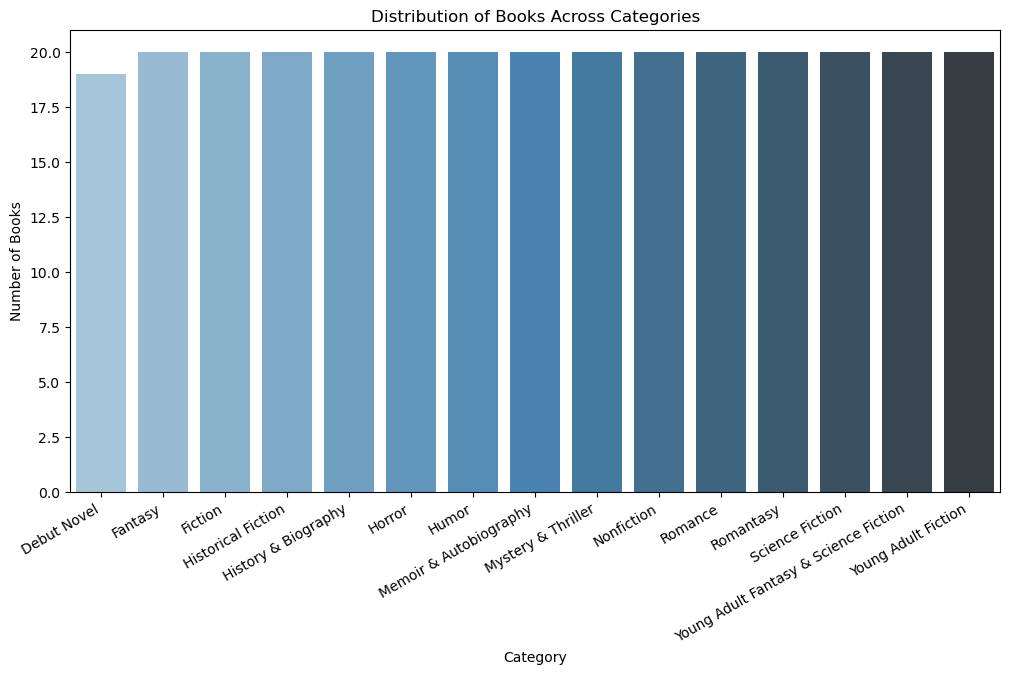

In [15]:
plt.figure(figsize=(12,6))

plt.figure(figsize=(12, 6))
sns.barplot(x=cat_count.index, y=cat_count.values, palette='Blues_d')
plt.title('Distribution of Books Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Books')
plt.xticks(rotation=30, ha='right')
plt.show()


La distribución es uniforme en todas las categorías con excepción de "Nobelas Debut".

Ahora seguiremos con las siguientes distribuciones:

* Votos
* Calificaciones
* Reseñas
* Páginas
* Precio

---
The distribution is uniform across all categories except for "Debut Novels".

Now we will continue with the following distributions:

* Votes
* Ratings
* Reviews
* Pages
* Price

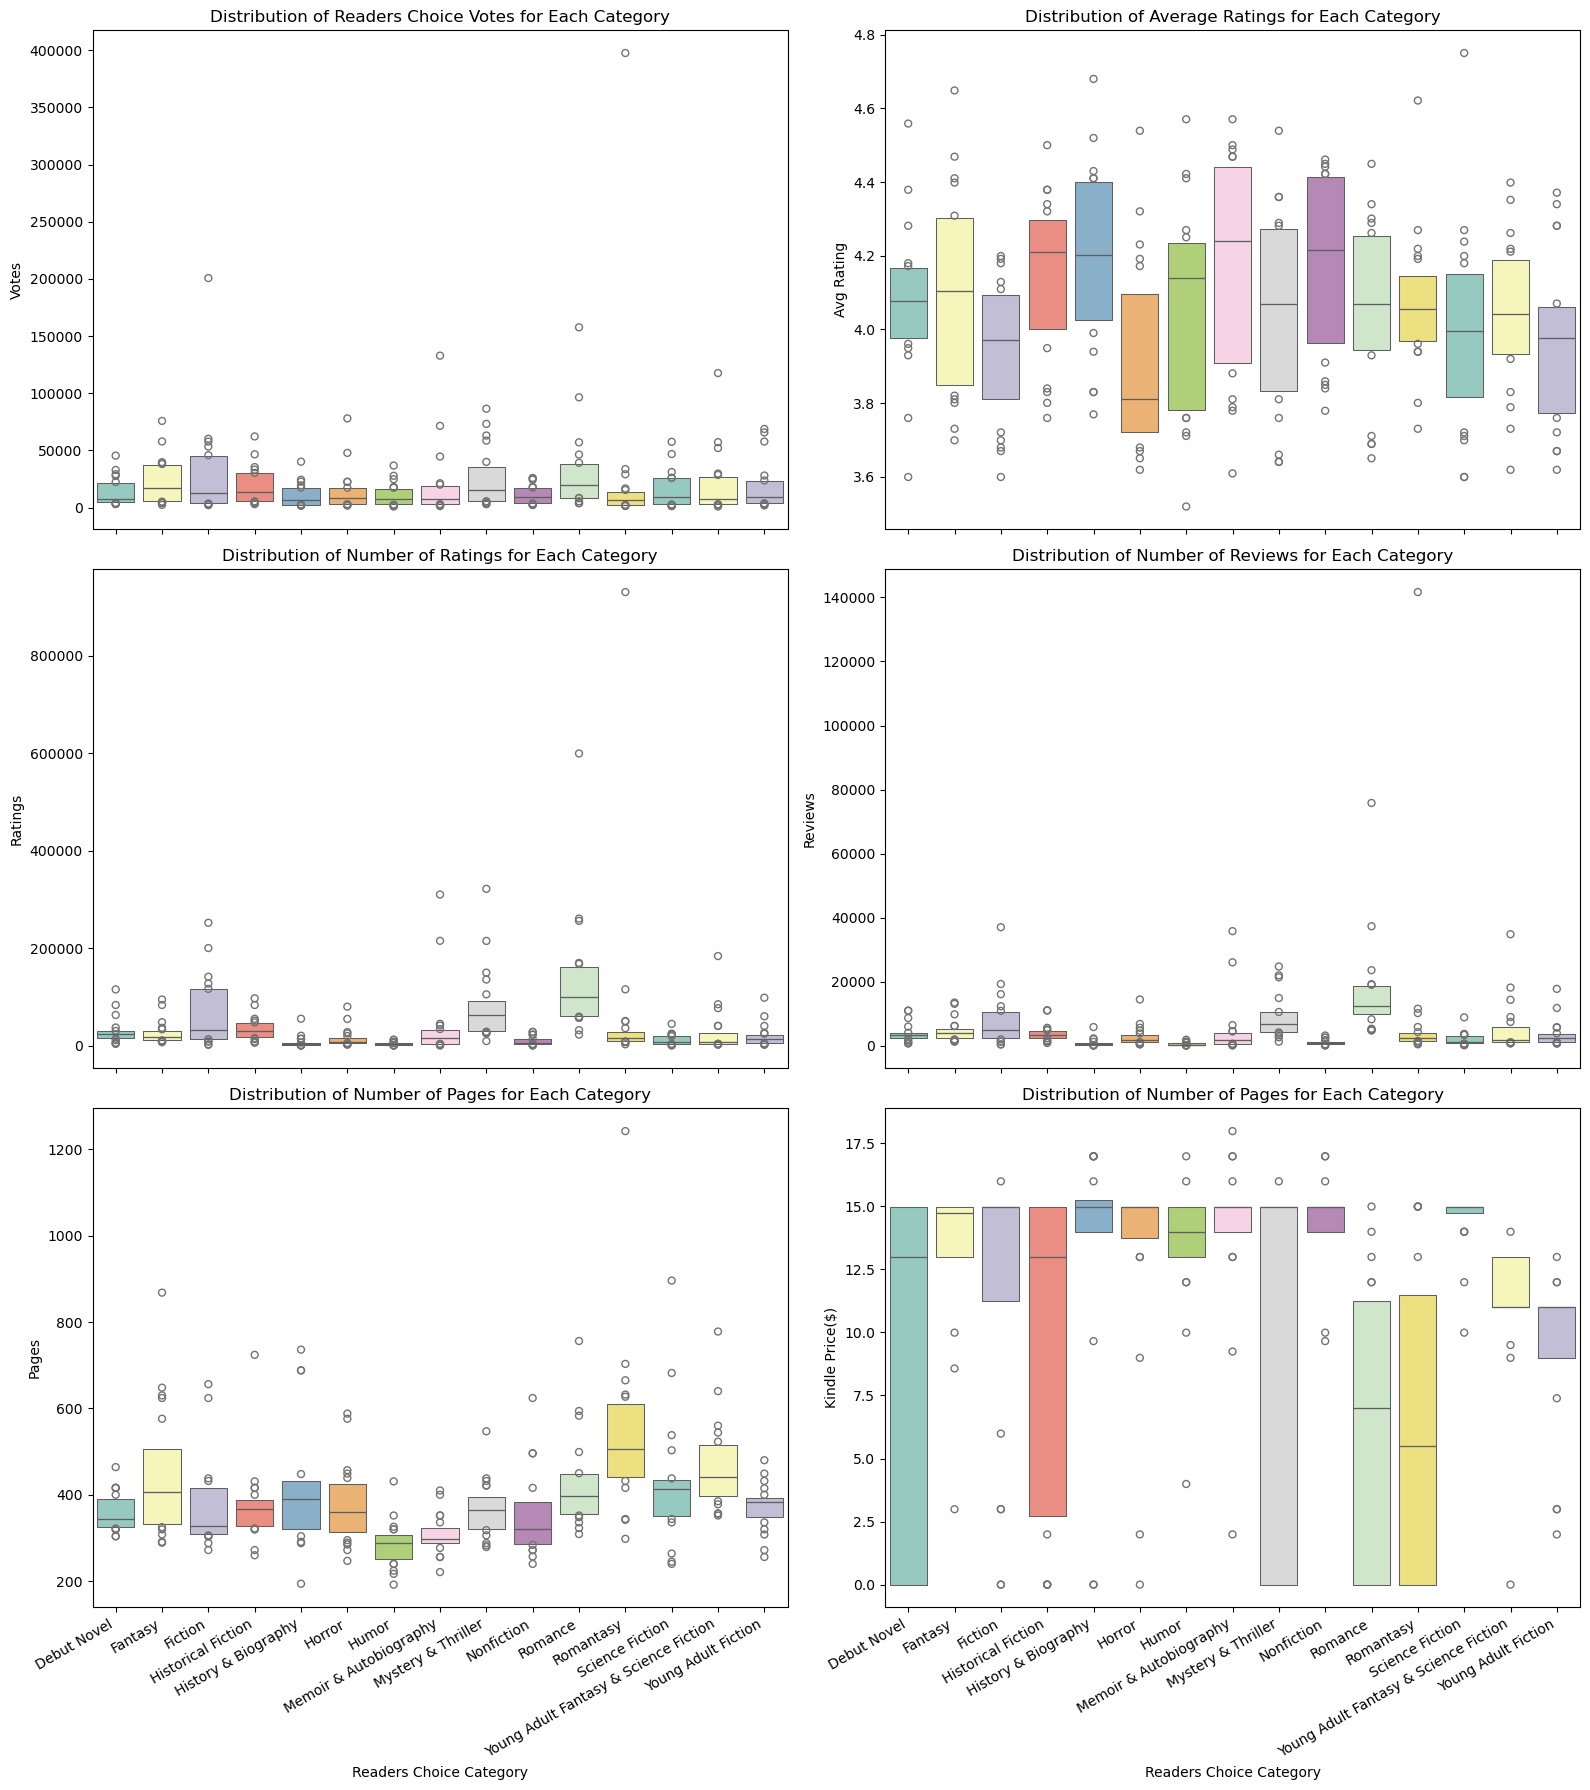

In [16]:
#A continuación, analizaremos la distribución de votos, calificaciones, reseñas, páginas y precio para cada categoría. Vamos a utilizar diagramas de caja (boxplot) para representar las distribuciones.
#crear funciones a partir de este prodyecto
fig, axes = plt.subplots(3,2, figsize=(16, 18), sharey=False, sharex=True)

# First plot Distributions of Readers Choice Votes
sns.boxenplot(data=df, x='Readers Choice Category',
               y='Readers Choice Votes',
               palette='Set3',
               ax=axes[0,0])
axes[0,0].set_title('Distribution of Readers Choice Votes for Each Category')
axes[0,0].set_ylabel('Votes')


# Second plot Distribution of Average Ratings
sns.boxenplot(data=df, x='Readers Choice Category',
               y='Total Avg Rating',
               palette='Set3',
               ax=axes[0,1])
axes[0,1].set_title('Distribution of Average Ratings for Each Category')
axes[0,1].set_ylabel('Avg Rating')


# third plot Distribution of Average Ratings
sns.boxenplot(data=df, x='Readers Choice Category',
               y='Number of Ratings',
               palette='Set3',
               ax=axes[1,0])
axes[1,0].set_title('Distribution of Number of Ratings for Each Category')
axes[1,0].set_ylabel('Ratings')


#Fourth plot Distribution of Average Ratings
sns.boxenplot(data=df, x='Readers Choice Category',
               y='Number of Reviews',
               palette='Set3',
               ax=axes[1,1])
axes[1,1].set_title('Distribution of Number of Reviews for Each Category')
axes[1,1].set_ylabel('Reviews')

# Fifth plot Distribution of Number of Pages
sns.boxenplot(data=df, x='Readers Choice Category',
               y='Number of Pages',
               palette='Set3',
               ax=axes[2,0])
axes[2,0].set_title('Distribution of Number of Pages for Each Category')
axes[2,0].set_ylabel('Pages')

# Sixth plot Distribution of Kindle Price
sns.boxenplot(data=df, x='Readers Choice Category',
               y='Kindle Price',
               palette='Set3',
               ax=axes[2,1])
axes[2,1].set_title('Distribution of Number of Pages for Each Category')
axes[2,1].set_ylabel('Kindle Price($)')

# los textos se superpones para eso creo un ciclo for que le de el formato
for ax in axes[2,]:
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30, ha='right')
fig.tight_layout()
plt.show()



En este caso, repito el mismo análisis pero agregué una función para reducir las líneas de código.

---

In this case, I repeat the same analysis but added a function to reduce the lines of code.

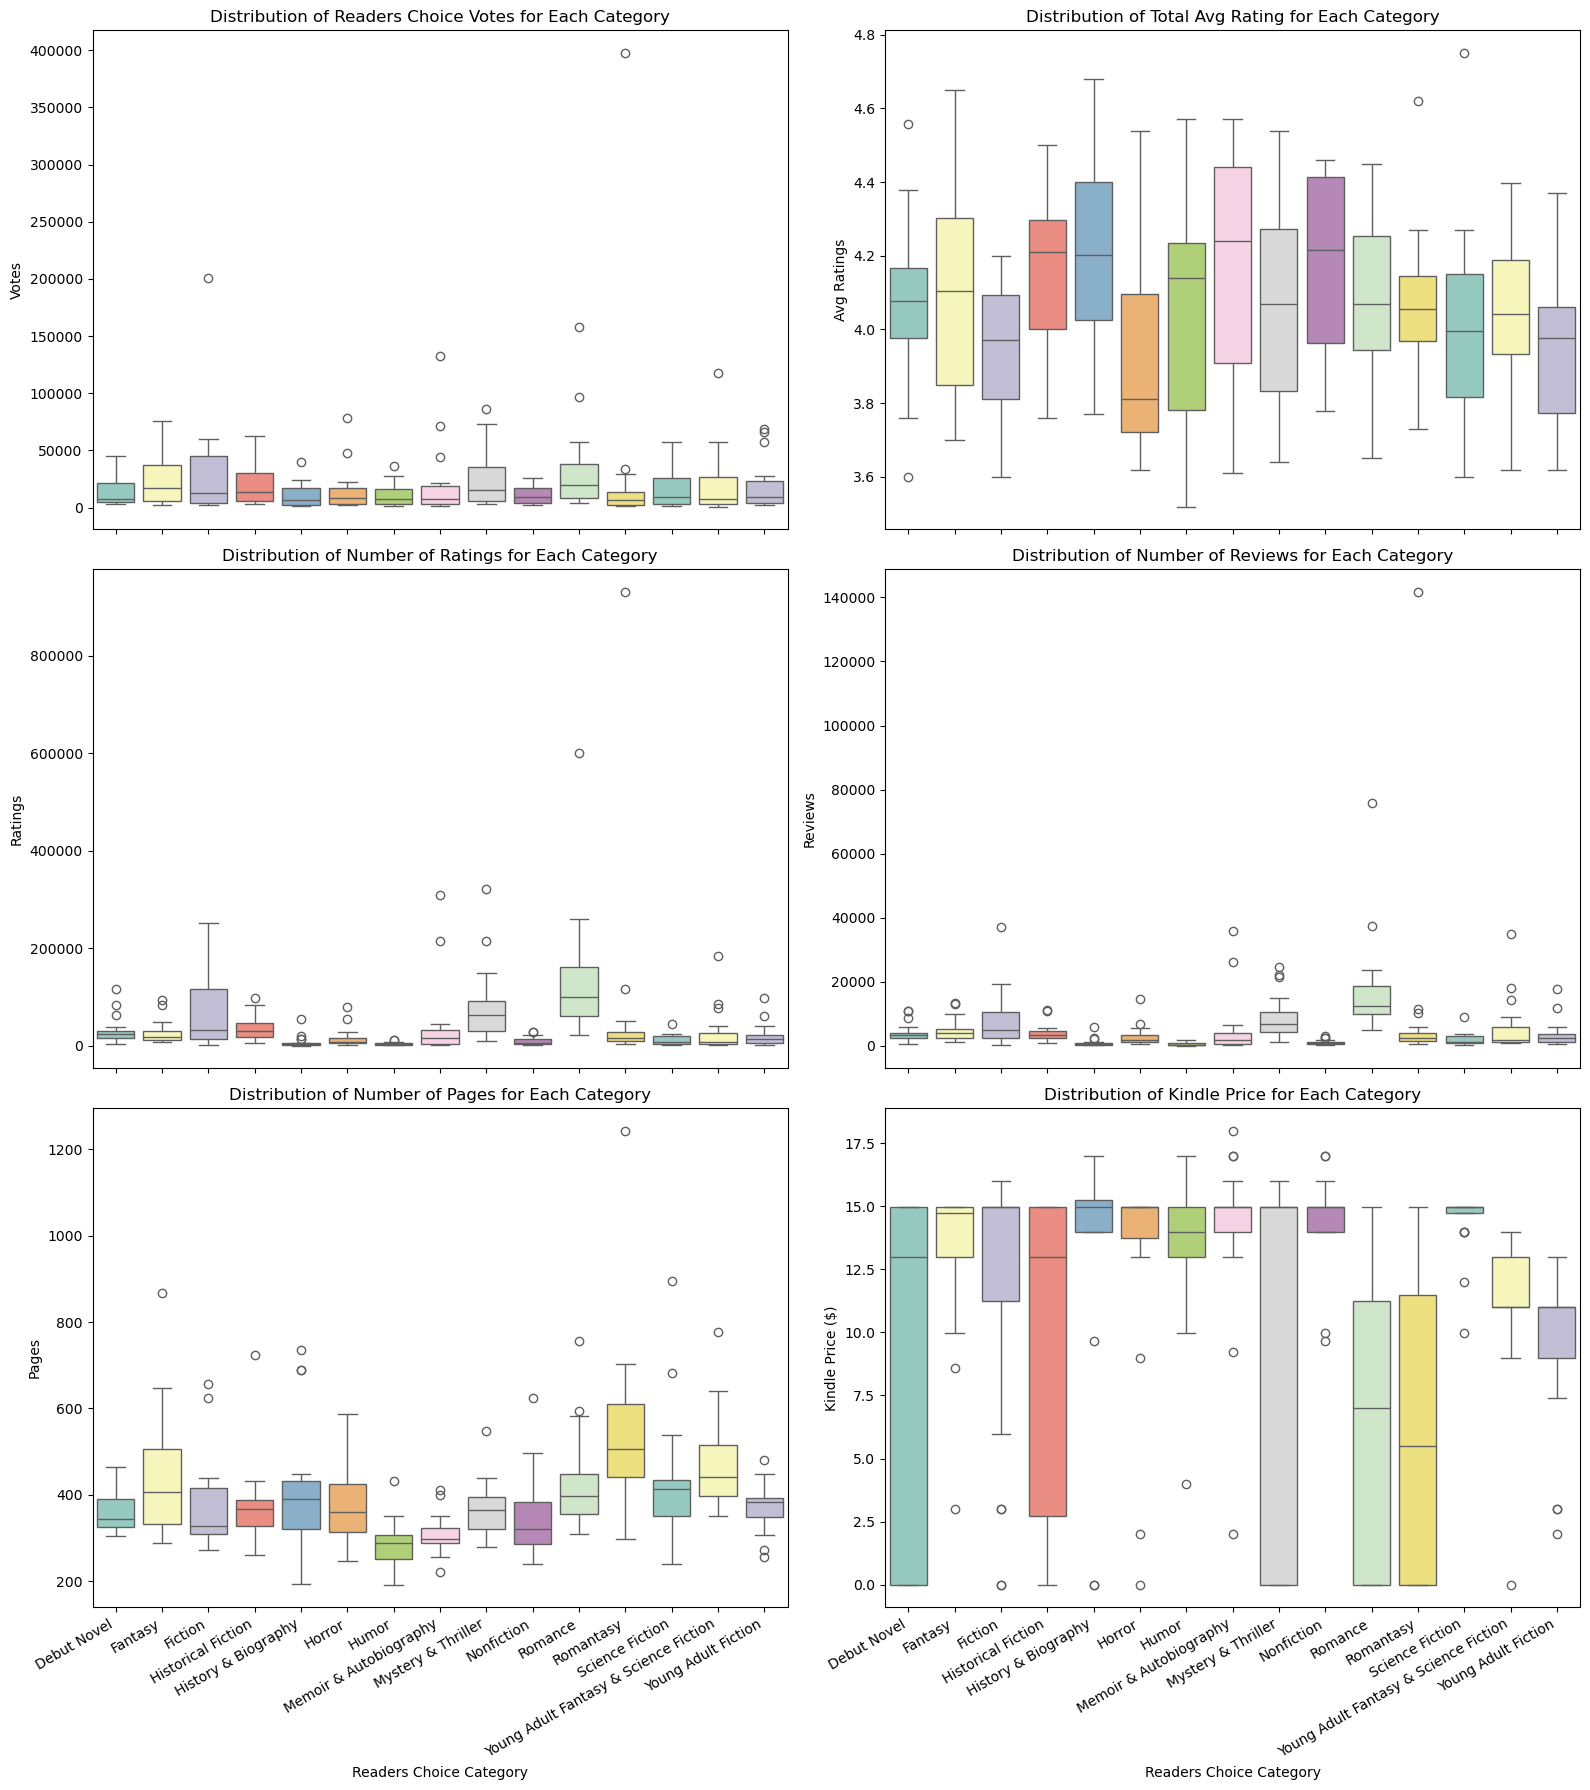

In [17]:

def plot_distributions(df):
    fig, axes = plt.subplots(3, 2, figsize=(16, 18), sharey=False, sharex=True)

    plots_info = [
        ('Readers Choice Votes', 'Votes'),
        ('Total Avg Rating', 'Avg Ratings'),
        ('Number of Ratings', 'Ratings'),
        ('Number of Reviews', 'Reviews'),
        ('Number of Pages', 'Pages'),
        ('Kindle Price', 'Kindle Price ($)')
    ]

    for i, (feature, ylabel) in enumerate(plots_info):
        row, col = divmod(i, 2)
        sns.boxplot(data=df, x='Readers Choice Category', y=feature, palette='Set3', ax=axes[row, col])
        axes[row, col].set_title(f'Distribution of {feature} for Each Category')
        axes[row, col].set_ylabel(ylabel)

    for ax in axes[2, :]:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

    fig.tight_layout()
    plt.show()

# Example usage:
plot_distributions(df)


### Conclucion primer analisis de distribucion



Como se puede ver, los datos en las columnas contienen valores atípicos, lo que sugiere que la información puede estar sesgada.

La mejor manera de medir los datos centrales es mediante la mediana en estos casos.

### Conclusion of the First Distribution Analysis

As you can see, the data in the columns contain outliers, which suggests that the information may be biased.

The best way to measure central data tendencies is through the median in these cases.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Readers Choice Votes     299 non-null    int32         
 1   Readers Choice Category  299 non-null    category      
 2   Title                    299 non-null    string        
 3   Author                   299 non-null    string        
 4   Total Avg Rating         299 non-null    float16       
 5   Number of Ratings        299 non-null    int32         
 6   Number of Reviews        299 non-null    int32         
 7   Number of Pages          299 non-null    int16         
 8   Edition                  299 non-null    category      
 9   First Published date     299 non-null    datetime64[ns]
 10  Kindle Price             299 non-null    float16       
 11  Kindle Version           299 non-null    category      
dtypes: category(3), datetime64[ns](1), f



## Analizando por categoría
Ahora analizaré por categoría basándome en votos, calificaciones, reseñas, páginas y precio, y descubriré cuál es la categoría más popular en 2023.

---

## Analyzing by Category
Now I will analyze by category based on votes, ratings, reviews, pages, and price, and I will discover which category is the most popular in 2023.

In [19]:


#Agrupar por categoría de libro
aggregations = {'Readers Choice Votes':'sum',
                'Total Avg Rating': 'mean',
                'Number of Ratings' :'sum',
                'Number of Reviews':'sum',
                'Number of Pages':'median',
                'Kindle Price':'median',

}
# Agrupar por Categoria de Libro
category_vote =  df.groupby('Readers Choice Category').agg(aggregations).sort_values('Readers Choice Votes', ascending=False)

# Calcule el porcentaje de votos totales, calificaciones totales y reseñas totales para cada categoría

total_votes= category_vote['Readers Choice Votes'].sum()
total_ratings = category_vote['Number of Ratings'].sum()
total_reviews = category_vote['Number of Reviews'].sum()


percent_of_total_votes = (category_vote['Readers Choice Votes']/total_votes)*100
percent_of_total_ratings =(category_vote['Number of Ratings']/total_ratings)*100
percent_of_total_reviews =(category_vote['Number of Reviews']/total_reviews)*100

# Crear un nuevo marco de datos de votos, calificaciones y reseñas
result_df = pd.DataFrame({
    'Votes (sum)': category_vote['Readers Choice Votes'], 
    '% Votes':percent_of_total_votes,
    'Avg Ratings': category_vote['Total Avg Rating'].round(2),
    'Number of Ratings': category_vote['Number of Ratings'],
    '% of Total  Ratings': percent_of_total_ratings.round(2),
    'Number of Reviews': category_vote['Number of Reviews'],
    '% of Total Reviews': percent_of_total_reviews.round(2),
    'Median Pages': category_vote['Number of Pages'],
    'Median Kindle Price': category_vote['Kindle Price'].round(2)


}

)


#Encuentra la categoría más votada
max_voted_cat = result_df['Votes (sum)'].idxmax()
max_votes = result_df['Votes (sum)'].max()
avg_rat =result_df.loc[max_voted_cat, 'Avg Ratings']

#Encuentra la categoría más valorada
max_rated_cat = result_df['Number of Ratings'].idxmax()
max_rates = result_df['Number of Ratings'].max()
pct_max_rates =result_df['% of Total  Ratings'].max()

#Encuentra la categoría más reseñada

max_reviewed_cat = result_df['Number of Reviews'].idxmax()
max_reviews = result_df['Number of Reviews'].max()
pct_max_reviews =result_df['% of Total Reviews'].max()

print(f"The Category '{max_voted_cat}'is The Most Voted Category of 2023, with {max_votes:,} votes" )
print("---")
print(f"The Category '{max_rated_cat}'is The Most Rated Category of 2023,  having an average rating of {format(avg_rat, '.2f')}, and number of ratings {max_rates:,} or {format(pct_max_rates,'.2f')}% of total ratings")
print("---")

result_df.info()


The Category 'Romance'is The Most Voted Category of 2023, with 645,601 votes
---
The Category 'Romance'is The Most Rated Category of 2023,  having an average rating of 4.05, and number of ratings 2,737,676 or 23.63% of total ratings
---
<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 15 entries, Romance to History & Biography
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Votes (sum)          15 non-null     int32  
 1   % Votes              15 non-null     float64
 2   Avg Ratings          15 non-null     float32
 3   Number of Ratings    15 non-null     int32  
 4   % of Total  Ratings  15 non-null     float64
 5   Number of Reviews    15 non-null     int32  
 6   % of Total Reviews   15 non-null     float64
 7   Median Pages         15 non-null     float64
 8   Median Kindle Price  15 non-null     float64
dtypes: float32(1), float64(5), int32(3)
memory usage: 1.8 KB




A continuación, voy a graficar estos datos para una mejor comprensión.

---

Next, I will plot these data for better understanding.

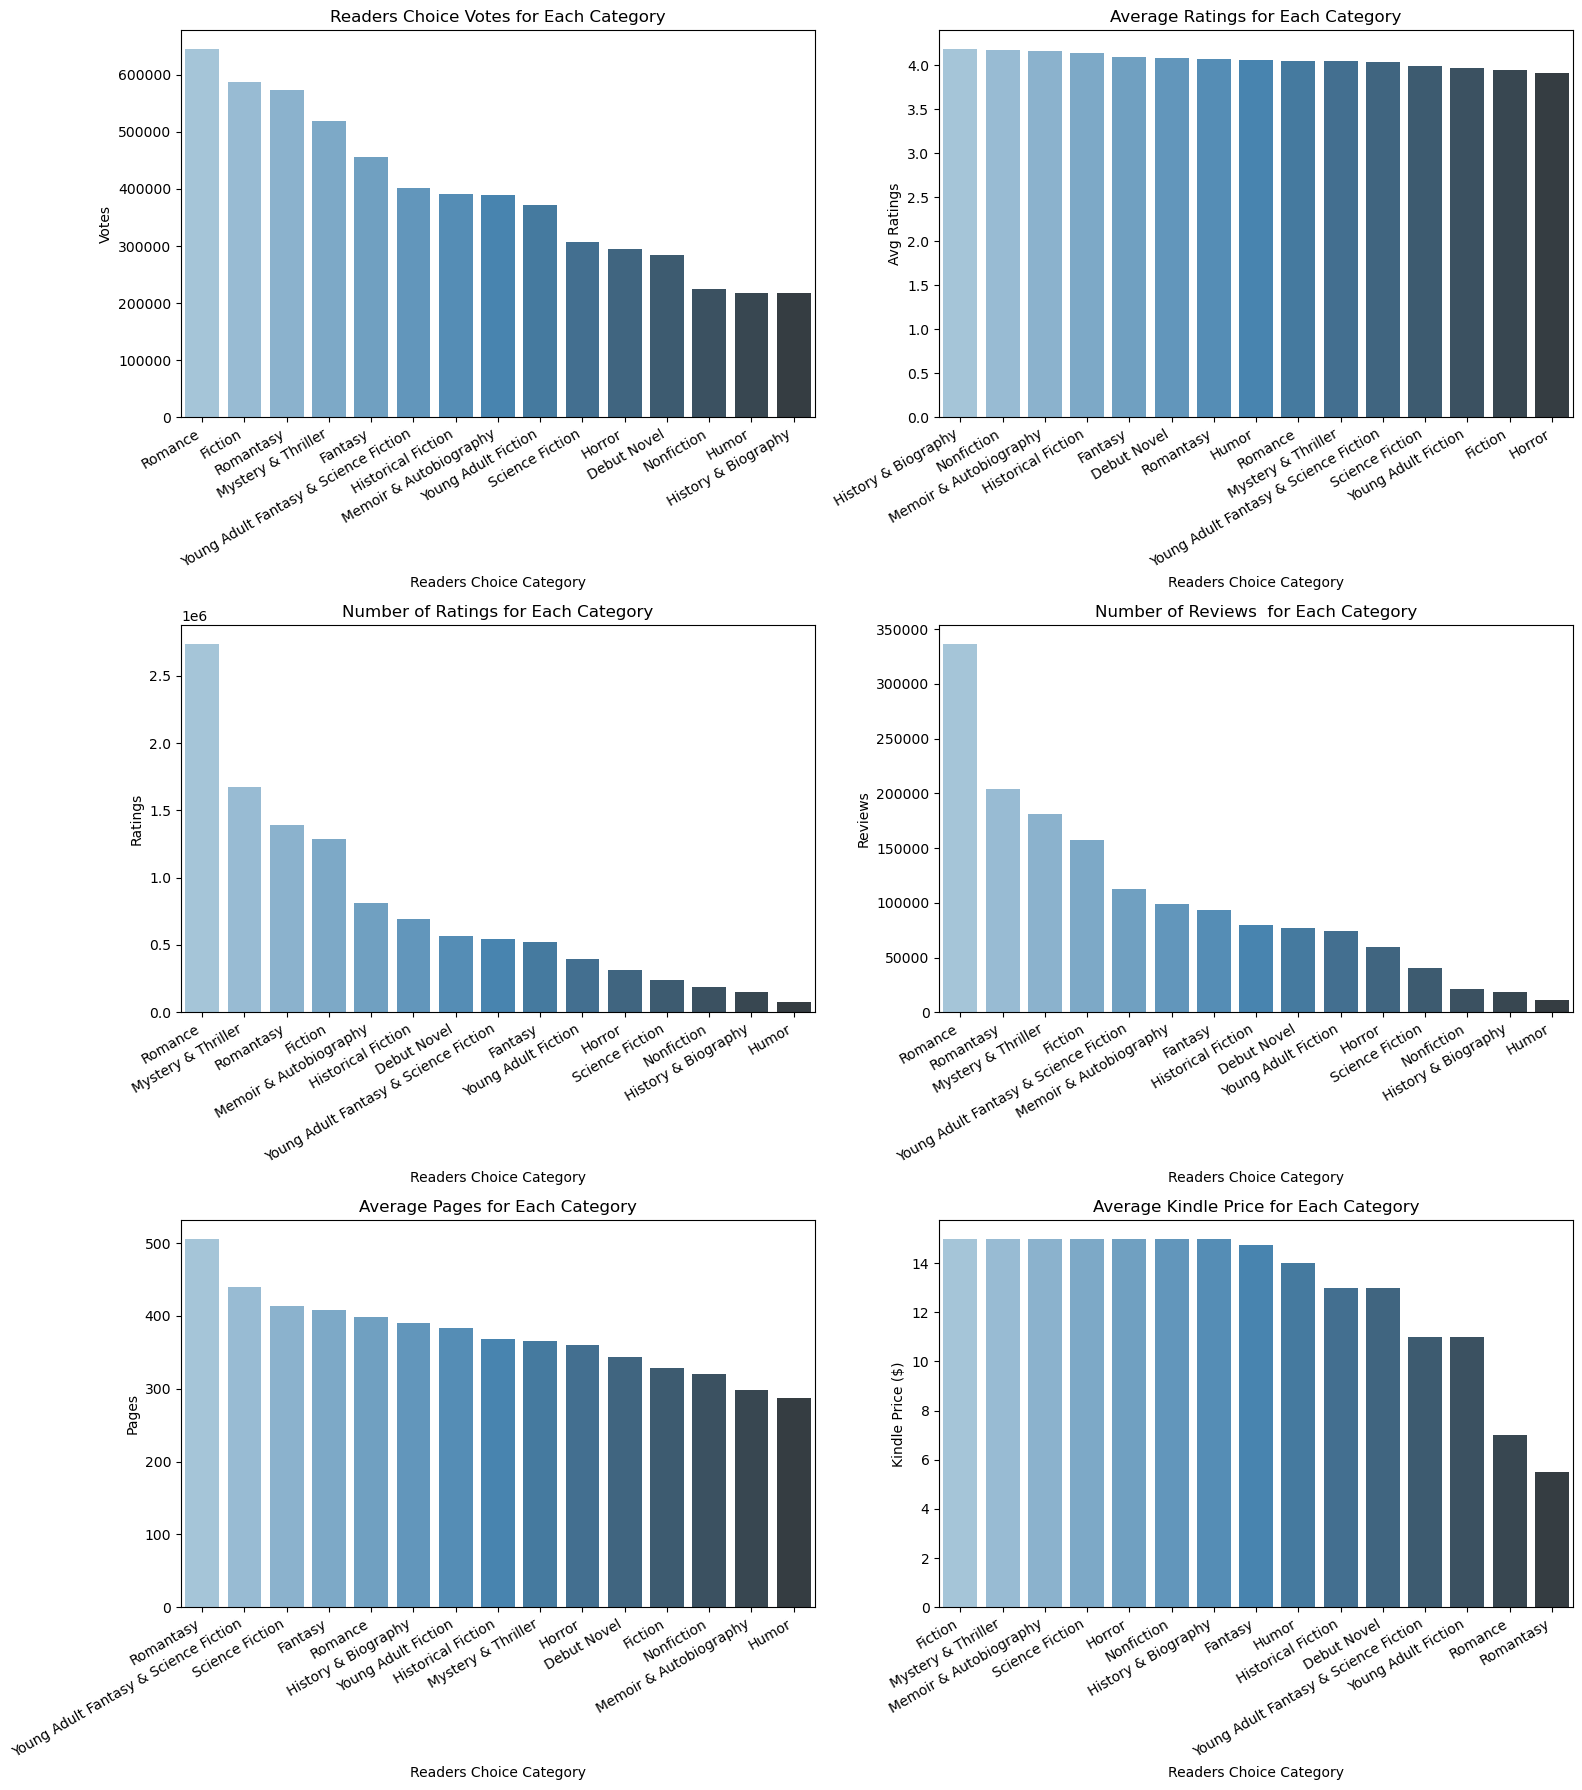

In [20]:
# se grafica para que se entienda mejor los resultados

fig, axes = plt.subplots(3,2, figsize=(16,18),sharey=False)

#Primer Grafico

sns.barplot(x=result_df.index,
             y = result_df['Votes (sum)'],
             palette='Blues_d', 
             order= result_df.index,ax = axes[0,0])
axes[0,0].set_title('Readers Choice Votes for Each Category')
axes[0,0].set_ylabel('Votes')
axes[0,0].set_xticklabels(labels= result_df.index, rotation=30, ha='right')

#Segundo Grafico
result_df_sorted = result_df.sort_values(by='Avg Ratings', ascending=False)
sns.barplot(x=result_df_sorted.index,
             y = result_df_sorted['Avg Ratings'],
             palette='Blues_d', 
             order= result_df_sorted.index,ax = axes[0,1])
axes[0,1].set_title('Average Ratings for Each Category')
axes[0,1].set_ylabel('Avg Ratings')
axes[0,1].set_xticklabels(labels= result_df_sorted.index, rotation=30, ha='right')

#Tercer Grafico
result_df_sorted = result_df.sort_values(by='Number of Ratings',ascending=False)

sns.barplot(x=result_df_sorted.index,
             y = result_df_sorted['Number of Ratings'],
             palette='Blues_d', 
             order= result_df_sorted.index,ax = axes[1,0])
axes[1,0].set_title('Number of Ratings for Each Category')
axes[1,0].set_ylabel('Ratings')
axes[1,0].set_xticklabels(labels= result_df_sorted.index, rotation=30, ha='right')

#Cuarto Grafico
result_df_sorted = result_df.sort_values(by='Number of Reviews',ascending=False)
sns.barplot(x=result_df_sorted.index,
             y = result_df_sorted['Number of Reviews'],
             palette='Blues_d', 
             order= result_df_sorted.index,ax = axes[1,1])
axes[1,1].set_title('Number of Reviews  for Each Category')
axes[1,1].set_ylabel('Reviews')
axes[1,1].set_xticklabels(labels= result_df_sorted.index, rotation=30, ha='right')

#Quinto Grafico
result_df_sorted = result_df.sort_values(by='Median Pages',ascending=False)
sns.barplot(x=result_df_sorted.index,
             y = result_df_sorted['Median Pages'],
             palette='Blues_d', 
             order= result_df_sorted.index,ax = axes[2,0])
axes[2,0].set_title('Average Pages for Each Category')
axes[2,0].set_ylabel('Pages')
axes[2,0].set_xticklabels(labels= result_df_sorted.index, rotation=30, ha='right')

#Sexto Grafico
result_df_sorted = result_df.sort_values(by='Median Kindle Price',ascending=False)
sns.barplot(x=result_df_sorted.index,
             y = result_df_sorted['Median Kindle Price'],
             palette='Blues_d', 
             order= result_df_sorted.index,ax = axes[2,1])
axes[2,1].set_title('Average Kindle Price for Each Category')
axes[2,1].set_ylabel('Kindle Price ($)')
axes[2,1].set_xticklabels(labels= result_df_sorted.index, rotation=30, ha='right')

plt.tight_layout()
plt.show()




Romance se lleva el título como la categoría más popular en 2023.

Supera a otras categorías en votos, reseñas y calificaciones por el doble.

Historia y Biología son las menos populares en 2023.

El precio es muy similar en todas las categorías, a diferencia de Romance, que tiene un precio promedio más bajo.

---


Romance takes the title as the most popular category in 2023.

It outperforms other categories in votes, reviews, and ratings by double.

History and Biology are the least popular in 2023.

The price is very similar across all categories, except for Romance, which has a lower average price.



## Correlaciones

Ahora viene la pregunta. ¿Existe alguna correlación entre los votos, las reseñas, las calificaciones o incluso el número de páginas y el precio? ¿Tener más páginas significa que la calificación es mayor? ¿O la categoría con precio bajo significa más reseñas y calificaciones más altas? Vamos a averiguarlo.

---

## Correlations

Now comes the question. Is there any correlation between votes, reviews, ratings, or even the number of pages and the price? Does having more pages mean a higher rating? Or does a lower price category mean more reviews and higher ratings? Let's find out.

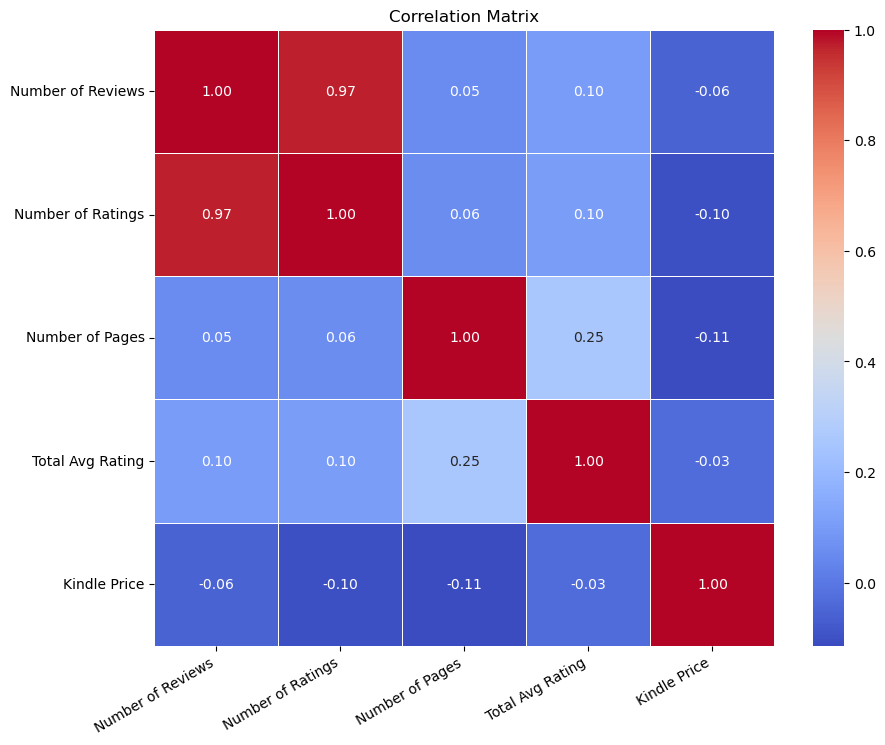

In [21]:
columns_of_interest = ['Number of Reviews', 'Number of Ratings', 'Number of Pages', 'Total Avg Rating', 'Kindle Price']

correlation_matrix = df[columns_of_interest].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm',
            fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix')
plt.xticks(rotation=30, ha='right')
plt.show()





Según esta matriz, los votos de elección de los lectores tienen altas correlaciones con el número de reseñas y el número de calificaciones. Las reseñas y calificaciones más altas se correlacionan con mayores votos. Las páginas y el precio no tienen una conexión fuerte con los votos, calificaciones y reseñas. Eso significa que el precio y el grosor del libro no afectan realmente los votos, las calificaciones y las reseñas.

---

According to this matrix, the reader choice votes have high correlations with the number of reviews and the number of ratings. Higher reviews and ratings correlate with higher votes. Pages and price do not have a strong connection with votes, ratings, and reviews. This means that the price and thickness of the book do not really affect votes, ratings, and reviews.



## Analizando por libro

Ahora quiero descubrir qué libro lleva el título de libro más votado en 2023.



## Analyzing by Book

Now I want to discover which book holds the title of the most voted book in 2023.

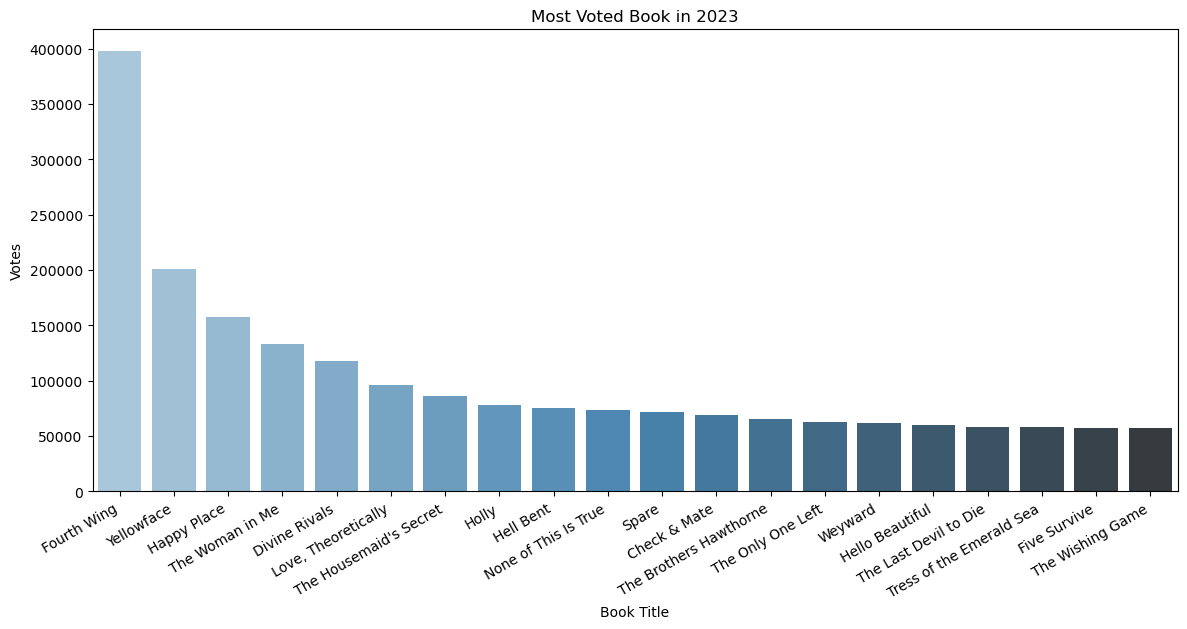

,Title,Readers Choice Category,Readers Choice Votes,Total Avg Rating,Number of Reviews,Number of Pages
80,Fourth Wing,Romantasy,397565,4.621094,141668,500
0,Yellowface,Fiction,200722,3.869141,37032,336
60,Happy Place,Romance,157687,4.050781,75814,400
239,The Woman in Me,Memoir & Autobiography,132867,4.050781,26056,277
160,Divine Rivals,Young Adult Fantasy & Science Fiction,117671,4.261719,34829,357
61,"Love, Theoretically",Romance,96439,4.160156,37318,389
40,The Housemaid's Secret,Mystery & Thriller,86468,4.281250,21398,318
140,Holly,Horror,77993,4.191406,6818,449
100,Hell Bent,Fantasy,75800,4.160156,13508,481
41,None of This Is True,Mystery & Thriller,73187,4.179688,24754,384


In [22]:
most_voted_books = df[['Title', 'Readers Choice Category', 'Readers Choice Votes', 'Total Avg Rating', 'Number of Reviews', 'Number of Pages']].sort_values(by=['Readers Choice Votes', 'Number of Reviews'], ascending=False).head(20)

plt.figure(figsize=(14, 6))
sns.barplot(x=most_voted_books['Title'], y=most_voted_books['Readers Choice Votes'], data=most_voted_books, palette='Blues_d')
plt.title('Most Voted Book in 2023')
plt.xlabel('Book Title')
plt.ylabel('Votes')
plt.xticks(rotation= 30, ha='right')
plt.show()

most_voted_books




**Fourth Wing** domina la votación de los lectores de 2023 como el libro más popular, recibiendo casi el doble de votos que **Yellowface**, que ocupa el segundo lugar, y cerca de un millón de calificaciones. Se necesita más de la mitad de los votos sólo para la categoría **Romantasy**.



**Fourth Wing** dominates the 2023 readers' vote as the most popular book, receiving nearly twice as many votes as **Yellowface**, which ranks second, and close to a million ratings. More than half of the votes are needed just for the **Romantasy** category.

In [23]:
max_votes_index = df.groupby('Readers Choice Category')['Readers Choice Votes'].idxmax()

titles_with_max_votes = df.loc[max_votes_index, ['Readers Choice Category', 'Title', 'Readers Choice Votes', 'Total Avg Rating', 'Number of Ratings', 'Number of Reviews', 'Number of Pages']].sort_values('Readers Choice Votes', ascending=False)

titles_with_max_votes

,Readers Choice Category,Title,Readers Choice Votes,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages
80,Romantasy,Fourth Wing,397565,4.621094,930928,141668,500
0,Fiction,Yellowface,200722,3.869141,252189,37032,336
60,Romance,Happy Place,157687,4.050781,599665,75814,400
239,Memoir & Autobiography,The Woman in Me,132867,4.050781,215178,26056,277
160,Young Adult Fantasy & Science Fiction,Divine Rivals,117671,4.261719,183916,34829,357
40,Mystery & Thriller,The Housemaid's Secret,86468,4.281250,321845,21398,318
140,Horror,Holly,77993,4.191406,54849,6818,449
100,Fantasy,Hell Bent,75800,4.160156,94667,13508,481
180,Young Adult Fiction,Check & Mate,68736,4.058594,60351,11800,352
20,Historical Fiction,Weyward,62211,4.121094,83461,11008,329




A continuación, averiguaré la cantidad de libros publicados cada mes en 2023.

---


Next, I will find out the number of books published each month in 2023.

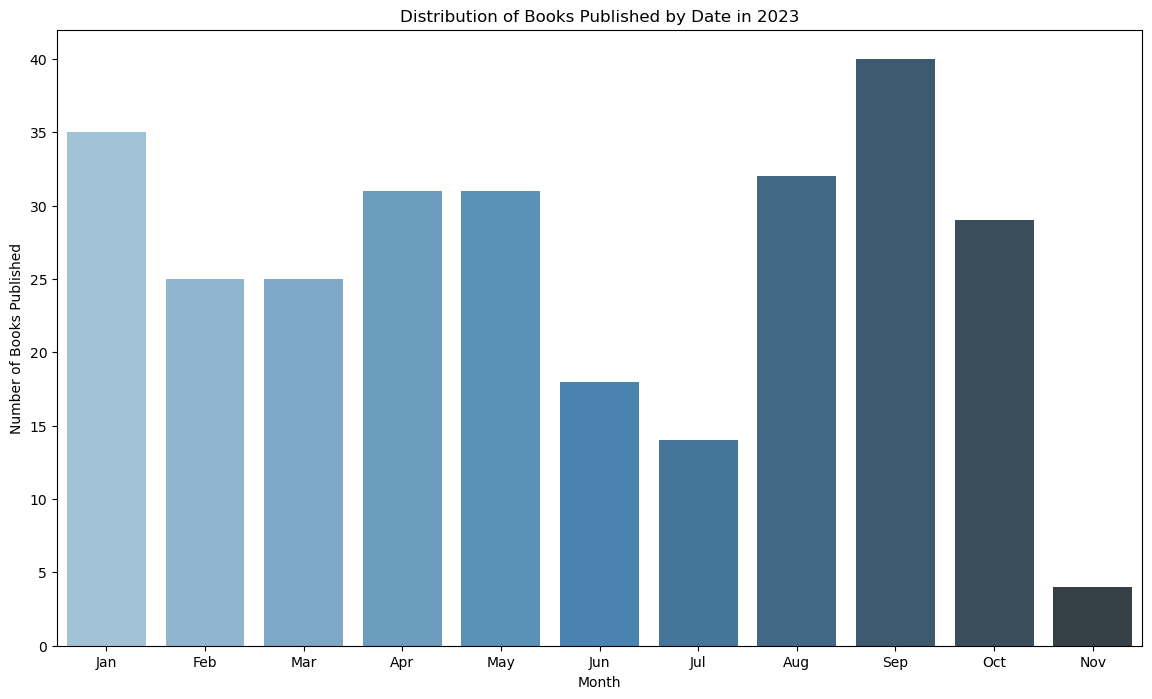

,Month,Title
0,Jan,35
1,Feb,25
2,Mar,25
3,Apr,31
4,May,31
5,Jun,18
6,Jul,14
7,Aug,32
8,Sep,40
9,Oct,29


In [24]:
#trabajo con fechas
import calendar 
df['First Published date'] = pd.to_datetime(df['First Published date'])

#solo libros del 2023
books_2023 = df[df['First Published date'].dt.year == 2023]

#libros publicados cada mes
books_per_month = books_2023.groupby(books_2023['First Published date'].dt.month)['Title'].count().reset_index()
books_per_month['Month'] = books_per_month['First Published date'].apply(lambda x: calendar.month_abbr[x])

plt.figure(figsize=(14,8))
sns.barplot(data= books_per_month, 
            x='Month', 
            y='Title',
            palette='Blues_d')
plt.title('Distribution of Books Published by Date in 2023')
plt.xlabel('Month')
plt.ylabel('Number of Books Published')
plt.show()

books_per_month[['Month', 'Title']]




Noviembre tiene la menor cantidad de libros publicados, mientras que septiembre y enero son los meses con más libros publicados.

## Conclusión

En este análisis, determiné qué categoría es la más y la menos popular en 2023. Realicé un análisis de distribución y un análisis de correlación entre páginas, votos, calificaciones y reseñas para descubrir si existe alguna conexión entre esos valores.

¡Deja un comentario!

---


November has the fewest books published, while September and January are the months with the most books published.

## Conclusion

In this analysis, I determined which category is the most and least popular in 2023. I performed a distribution analysis and a correlation analysis between pages, votes, ratings, and reviews to discover if there is any connection between these values.

Leave a comment!